In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Cuisines,City,Rating,NumberOfReviews
0,0,Wakame,"Japanese, Asian",Riyadh,4.9,20
1,1,Morini Italian Restaurant,"International, Italian",Riyadh,4.5,18
2,2,Wakame,"Chinese, Japanese",Jeddah,4.8,63
3,3,Il Baretto Italian Restaurant,Italian,Riyadh,4.5,30
4,4,Vidro Lounge,"Mediterranean, Middle Eastern",Riyadh,4.7,31


In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [11]:
df.City.value_counts()

City
Jeddah                                     461
Riyadh                                     369
Makkah                                     240
Al Khobar                                  108
Madinah                                     84
AlUla                                       36
Dammam                                      35
Taif                                        15
Jazan                                       14
Dhahran                                      5
The Riyadh Province                          1
Rabigh                                       1
Name: count, dtype: int64

In [9]:
df.dtypes

Name                object
Cuisines            object
City                object
Rating             float64
NumberOfReviews      int64
dtype: object

In [13]:
df_encoded = df.drop(['Name', 'Cuisines'], axis = 1)

In [14]:
df_encoded.head()

,City,Rating,NumberOfReviews
0,Riyadh,4.9,20
1,Riyadh,4.5,18
2,Jeddah,4.8,63
3,Riyadh,4.5,30
4,Riyadh,4.7,31


In [15]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()
df_encoded['City'] = encoder.fit_transform(df_encoded['City'])

In [33]:
df_encoded.head()

,City,Rating,NumberOfReviews
0,9,4.9,20
1,9,4.5,18
2,5,4.8,63
3,9,4.5,30
4,9,4.7,31


In [34]:
df_encoded.dtypes

City                 int64
Rating             float64
NumberOfReviews      int64
dtype: object

In [35]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[['Rating', 'NumberOfReviews']])

In [36]:
city_reshaped = df_encoded['City'].values.reshape(-1, 1)

In [37]:
city_reshaped

array([[9],
       [9],
       [5],
       ...,
       [9],
       [7],
       [5]])

In [38]:
df_scaled = np.hstack((df_scaled, city_reshaped))

In [39]:
df_scaled

array([[ 1.61099021, -0.54257666,  9.        ],
       [ 0.61395332, -0.69103023,  9.        ],
       [ 1.36173099,  2.64917512,  5.        ],
       ...,
       [-1.8786389 , -0.09721594,  9.        ],
       [-2.62641657,  1.2388662 ,  7.        ],
       [-1.8786389 ,  0.27391798,  5.        ]])

In [40]:
kmeans = KMeans(n_clusters = 3, random_state = 777)
kmeans_labels = kmeans.fit_predict(df_scaled)


[2 2 0 ... 2 0 0]


In [42]:
kmeans_labels

array([2, 2, 0, ..., 2, 0, 0], dtype=int32)

In [55]:
wcss = []
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [57]:
import matplotlib.pyplot as plt

In [71]:
kmeans = KMeans(n_clusters = 3, random_state = 777)
kmeans_labels = kmeans.fit_predict(df_scaled)


In [67]:
import joblib
joblib.dump(kmeans, 'kmeans.joblib')

['kmeans.joblib']

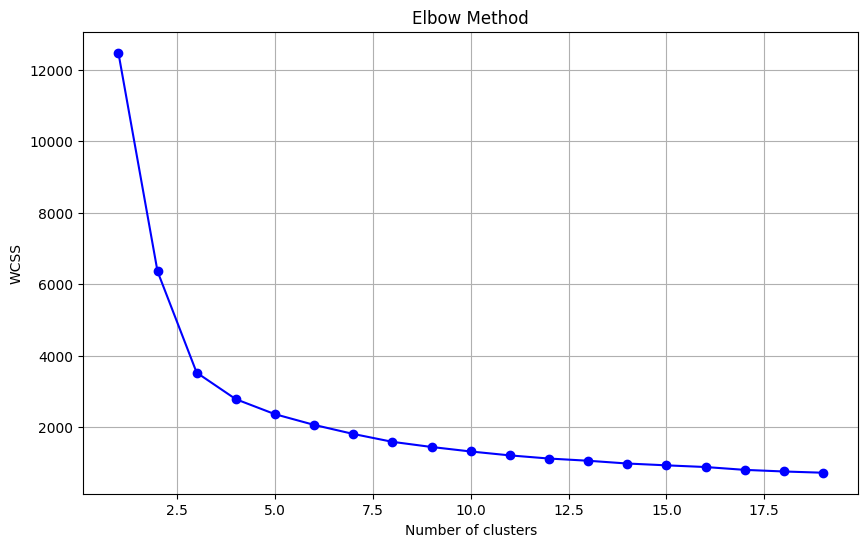

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [43]:
from sklearn.cluster import DBSCAN 

In [89]:
dbscan = DBSCAN(eps = 1, min_samples = 4)
dbscan_labels = dbscan.fit_predict(df_scaled)
len(np.unique(dbscan_labels))

4

In [60]:
X_scaled = df_scaled

In [72]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
df_encoded['Kmeans'] = kmeans_labels 
df_pca = pca.fit_transform(df_scaled)


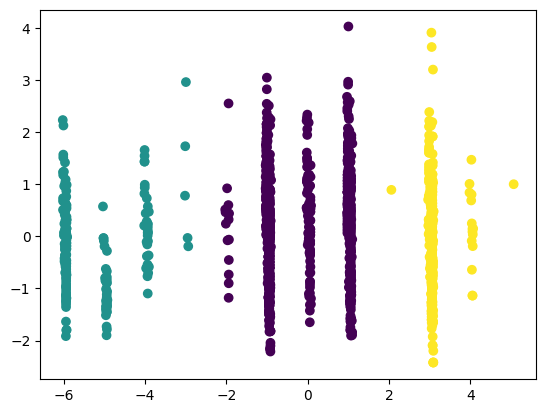

In [73]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = kmeans_labels, cmap= 'viridis')

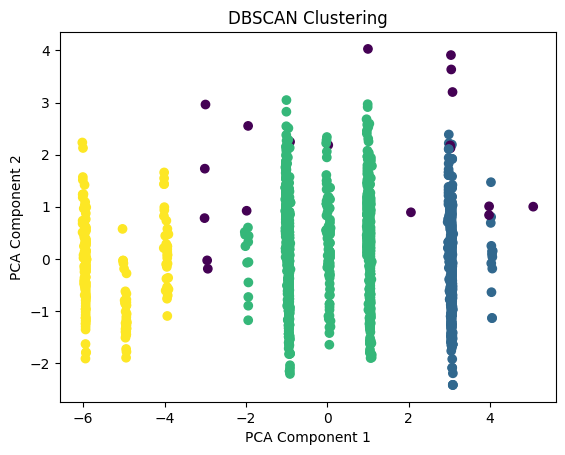

In [90]:
df['DBSCAN_Cluster'] = dbscan_labels
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()